## Exercise

- In this exercise, we will work on a classification task of Brexit referendum vote
- The data is originally from British Election Study Online Panel
  - codebook: https://www.britishelectionstudy.com/wp-content/uploads/2020/05/Bes_wave19Documentation_V2.pdf
- The outcome is `LeaveVote` (1: Leave, 0: otherwise)
- The input we use are coming from the following article:
  - Hobolt, Sara (2016) The Brexit vote: a divided nation, a divided continent. _Journal of European Public Policy_, 23 (9) (https://doi.org/10.1080/13501763.2016.1225785)

In [1]:
!wget https://www.dropbox.com/s/up1zpkozgscaty1/brexit_bes_sampled_data.csv

--2020-12-15 16:10:11--  https://www.dropbox.com/s/up1zpkozgscaty1/brexit_bes_sampled_data.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/up1zpkozgscaty1/brexit_bes_sampled_data.csv [following]
--2020-12-15 16:10:11--  https://www.dropbox.com/s/raw/up1zpkozgscaty1/brexit_bes_sampled_data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2ee17fe187bf74adb10b8af876.dl.dropboxusercontent.com/cd/0/inline/BFLfX6MZa00cz1EcqCRUcrICQ-iNMXVC8K71Ke4s_QGjeXf2Qo9rwmCNtbrtCyhTkedusOdyytBPOUbfg9e7DrnuSuykQBAZGwtys5q5AgLFN10rcpi75nn5hE7NTEy-bNs/file# [following]
--2020-12-15 16:10:12--  https://uc2ee17fe187bf74adb10b8af876.dl.dropboxusercontent.com/cd/0/inline/BFLfX6MZa00cz1EcqCRUcrICQ-iNMXVC8K71Ke4s_QGjeXf2Qo9rwmCNtbrtCyhTke

## Import packages

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Load data

In [3]:
df_bes = pd.read_csv("brexit_bes_sampled_data.csv")

In [4]:
df_bes.head()

,LeaveVote,gender,age,edlevel,hhincome,econPersonalRetro1,EuropeanIdentity,EnglishIdentity,BritishIdentity,PolMistrust,GovDisapproval,PopulismScale,ConVote,LabVote,LibVote,SNPPCVote,UKIP,euUKNotRich,euNotPreventWar,FreeTradeBad,euParlOverRide1,euUndermineIdentity1,lessEUmigrants,effectsEUTrade1,effectsEUImmigrationLower
0,0,1,47,4,1,3,7,2,2,7,5,15,0,1,0,0,0,3,2,1,2,2,7,2,3
1,0,1,64,3,3,3,5,4,4,7,5,15,0,0,0,0,0,2,2,1,2,2,5,3,3
2,0,2,70,4,4,2,4,7,7,6,4,15,1,0,0,0,0,3,3,1,4,2,5,2,3
3,1,1,39,4,4,3,1,7,7,5,5,15,0,1,0,0,0,3,3,3,3,3,7,3,3
4,1,1,66,0,1,1,1,7,7,7,5,25,0,0,0,0,0,5,5,3,5,5,10,3,4


# Model

- There are four models in the article. We will use the idenity model (Model 2 in Table 2)
- List of input variables:
  gender, age, edlevel, hhincome, EuropeanIdentity, EnglishIdentity, BritishIdentity

In [5]:
df_bes_sub = df_bes[['gender', 'age', 'edlevel', 'hhincome', 'EuropeanIdentity', 'EnglishIdentity', 'BritishIdentity', 'LeaveVote']]

In [6]:
df_bes_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            2000 non-null   int64
 1   age               2000 non-null   int64
 2   edlevel           2000 non-null   int64
 3   hhincome          2000 non-null   int64
 4   EuropeanIdentity  2000 non-null   int64
 5   EnglishIdentity   2000 non-null   int64
 6   BritishIdentity   2000 non-null   int64
 7   LeaveVote         2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [7]:
df_bes_sub.corr()

,gender,age,edlevel,hhincome,EuropeanIdentity,EnglishIdentity,BritishIdentity,LeaveVote
gender,1.000000,-0.048662,0.017219,-0.103530,-0.059694,0.066933,0.061334,0.002768
age,-0.048662,1.000000,-0.237091,-0.141056,-0.118503,0.148634,0.198027,0.242121
edlevel,0.017219,-0.237091,1.000000,0.246491,0.286770,-0.224844,-0.119086,-0.289570
hhincome,-0.103530,-0.141056,0.246491,1.000000,0.116276,-0.058214,0.026600,-0.119530
EuropeanIdentity,-0.059694,-0.118503,0.286770,0.116276,1.000000,-0.207487,-0.068003,-0.587141
EnglishIdentity,0.066933,0.148634,-0.224844,-0.058214,-0.207487,1.000000,0.437209,0.316757
BritishIdentity,0.061334,0.198027,-0.119086,0.026600,-0.068003,0.437209,1.000000,0.195369
LeaveVote,0.002768,0.242121,-0.289570,-0.119530,-0.587141,0.316757,0.195369,1.000000


# Train-test split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df_bes_sub.iloc[:, :7]
print(X)
y = df_bes_sub['LeaveVote']
print(y)


      gender  age  edlevel  ...  EuropeanIdentity  EnglishIdentity  BritishIdentity
0          1   47        4  ...                 7                2                2
1          1   64        3  ...                 5                4                4
2          2   70        4  ...                 4                7                7
3          1   39        4  ...                 1                7                7
4          1   66        0  ...                 1                7                7
...      ...  ...      ...  ...               ...              ...              ...
1995       2   43        2  ...                 1                7                1
1996       1   63        0  ...                 1                7                7
1997       2   47        5  ...                 7                4                4
1998       2   62        2  ...                 4                1                7
1999       1   41        4  ...                 7                7          

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

In [11]:
print(X_train.shape)
print(X_test.shape)

(1400, 7)
(600, 7)


In [12]:
X_train

,gender,age,edlevel,hhincome,EuropeanIdentity,EnglishIdentity,BritishIdentity
836,2,35,4,7,3,1,7
575,1,50,4,2,5,7,7
557,2,46,4,4,6,1,7
1235,1,61,4,6,7,7,5
1360,1,61,2,3,1,7,7
...,...,...,...,...,...,...,...
1130,1,61,2,3,7,1,3
1294,2,68,2,7,4,6,6
860,2,57,3,6,6,5,6
1459,1,26,4,4,6,6,6


# Data wrangling

In [13]:
from sklearn.preprocessing import StandardScaler
st_scaler = StandardScaler()

In [14]:
X_train = st_scaler.fit_transform(X_train)
X_test = st_scaler.transform(X_test)

In [15]:
X_test[:3]

array([[-1.01438923,  0.50890204,  0.72160821, -1.69350473,  0.69767519,
        -0.01890441,  0.89670096],
       [ 0.98581488,  1.09810386, -0.00414717, -0.52786726,  0.1792329 ,
         0.89372229,  0.89670096],
       [ 0.98581488,  1.39270478,  0.72160821, -1.11068599,  0.1792329 ,
         0.43740894, -0.34933512]])

## Fit logistic model

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
logitmod = LogisticRegression()

In [18]:
logitmod.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Model evaluations

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
pred_logit = logitmod.predict(X_test)
pred_logit

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,

In [21]:
confusion_matrix(y_test, pred_logit)

array([[246,  56],
       [ 66, 232]])

In [22]:
print(classification_report(y_test, pred_logit))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       302
           1       0.81      0.78      0.79       298

    accuracy                           0.80       600
   macro avg       0.80      0.80      0.80       600
weighted avg       0.80      0.80      0.80       600



In [23]:
from sklearn.metrics import classification_report, confusion_matrix

## KNN classifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knnmod = KNeighborsClassifier(n_neighbors = 2)
knnmod.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [26]:
pred_knn = knnmod.predict(X_test)
pred_knn

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,

In [27]:
confusion_matrix(y_test, pred_knn)

array([[258,  44],
       [128, 170]])

In [28]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.67      0.85      0.75       302
           1       0.79      0.57      0.66       298

    accuracy                           0.71       600
   macro avg       0.73      0.71      0.71       600
weighted avg       0.73      0.71      0.71       600



### Parameter tuning for KNN



In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score, average = 'binary', pos_label = 1)

In [30]:
knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 7, 10, 15, 20, 25, 30, 40]}
knn_cv = GridSearchCV(knn2, param_grid, cv=10, verbose = 2, scoring = f1)
#fit model to data
knn_cv.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................................... n_neighbors=2, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    1.4s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 7, 10, 15, 20, 25, 30,
                                         40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(f1_score, average=binary, pos_label=1),
             verbose=2)

In [31]:
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 15}
0.7766133602881017


In [32]:
predict_knn = knn_cv.predict(X_test)
confusion_matrix(y_test, predict_knn)

array([[251,  51],
       [ 67, 231]])

In [33]:
print(classification_report(y_test, predict_knn))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       302
           1       0.82      0.78      0.80       298

    accuracy                           0.80       600
   macro avg       0.80      0.80      0.80       600
weighted avg       0.80      0.80      0.80       600



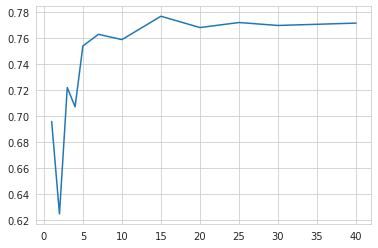

In [34]:
sns.set_style('whitegrid')
plt.plot([1, 2, 3, 4, 5, 7, 10, 15, 20, 25, 30, 40], knn_cv.cv_results_['mean_test_score'])

## Support Vector Classifier

- We try SVC here
- This is non-linear, parametric classifier
- Much more flexible than Logistic regression
- Fore more information, see Gareth et al, Chapter 9



In [35]:
from sklearn.svm import SVC
svcmod = SVC(gamma='auto')

In [36]:
svcmod.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
svcmod.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
pred_svc = svcmod.predict(X_test)

In [39]:
print(confusion_matrix(y_test, pred_svc))
print(classification_report(y_test, pred_svc))

[[243  59]
 [ 67 231]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       302
           1       0.80      0.78      0.79       298

    accuracy                           0.79       600
   macro avg       0.79      0.79      0.79       600
weighted avg       0.79      0.79      0.79       600



In [40]:
param_grid = {'C':[1,10,100,1000], # cost for miss classification
              'gamma':[1,0.1,0.001,0.0001], # flexibility of the model 
              'kernel':['rbf']}
svc_cv = GridSearchCV(SVC(),param_grid, refit = True, verbose=2)
svc_cv.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=1, gamma=1, kernel=rbf ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    7.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [41]:
print(svc_cv.best_score_)
print(svc_cv.best_params_)

0.8149999999999998
{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [42]:
pred_svc = svc_cv.predict(X_test)
print(classification_report(y_test, pred_svc))
print(confusion_matrix(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       302
           1       0.81      0.77      0.79       298

    accuracy                           0.79       600
   macro avg       0.79      0.79      0.79       600
weighted avg       0.79      0.79      0.79       600

[[247  55]
 [ 69 229]]
